In [1]:
from helpers import *
from Line import *

TESTIMG = 'test_images/solidWhiteRight.jpg'
img = readImg(TESTIMG)
params = getParams()



%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
# %load lanedetector.py
from helpers import *

blkrSize = params["blurKernalSize"]
cht = params["cannyHT"]
clt = params["cannyLT"]
stage = params["outputStage"]


hsv = getHSV(img)

bMask = hsv[:,:,2] > params.get("bThresh", 200)

if params["useBrightness"]:
    # gray = hsv[:,:,2]
    gray = bMask.astype(np.uint8)*255
else:
    gray = grayscale(img)

blur = gaussian_blur(gray, kernel_size=blkrSize)

ht = cht
lt = clt
canny_edges = canny(blur, low_threshold=lt, high_threshold=ht)

#hsv = getHSV(img)
bMask = cv2.bitwise_and(img, img, mask=bMask.astype(np.uint8))
bMask = cv2.cvtColor(bMask, cv2.COLOR_BGR2RGB)


rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = params.get("hThresh", 10)
min_line_length = params.get("hMinLineLen", 20)
max_line_gap = params.get("hMaxLineGap", 1)



hLines = get_hough_lines(canny_edges, rho, theta, threshold, min_line_length, max_line_gap)
houghImg = draw_hough_lines(canny_edges, hLines)

for l in hLines:
    ln = LineFromCVLine(l)
    ln.draw(img)


outpDict = {
        "final": img,
        "blur": blur,
        "gray": gray,
        "canny": canny_edges,
        "hsv": hsv,
        "brightness": hsv[:,:,2],
        "hue": hsv[:,:,1],
        "saturation": hsv[:,:,0],
        "bMask": bMask,
        "hough": houghImg,

}

outImg = outpDict[stage]


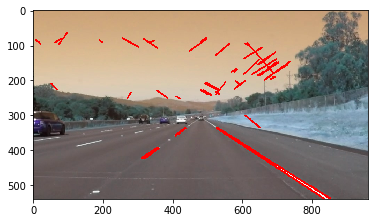

In [3]:
showimg(outImg)

In [4]:
l = LineFromCVLine(hLines[0])

In [5]:
l.slope, l.bias

(0.6257668711656442, 5.846625766871114)

In [6]:
params

{u'bThresh': 213,
 u'blurKernalSize': 5,
 u'cannyHT': 300,
 u'cannyLT': 40,
 u'hMaxLineGap': 17.6,
 u'hMinLineLen': 9,
 u'hThresh': 11,
 u'images': u'all',
 u'outputStage': u'final',
 u'useBrightness': True}